# Лабараторная №1. Основый предобработки данных 

Используйте файл своей группы. <br>
Загрузите его в DataFrame и ответьте на вопросы, используя инстурменты из файла preprocessing.ipynb.


#### Воспросы
1. В какой шкале представлены все признаки в наборе?<br>
2. Укажите признак с наименьшей дисперсией.<br>
3. Среднее какого признака отличается для двух классов сильнее всего?<br>
4. В каком классе больше всего skilled работников?<br>
5. Есть ли в наборе признаки с выбросами? Какие?<br>
6. Сколько пропущенных значений в наборе?<br>
7. Попытайтесь заполнить пропущенные значения.<br>
8. Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.<br>
9. Проанализируйте взаимосвязи признаков с помощью scatter-plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?<br>
10. Какой признак(и) имеет смысл стандартизировать? Почему?<br>
11. Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.<br>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

np.set_printoptions(precision=3)
pd.set_option('precision', 3)

sns.set()

In [2]:
path='credit_3530203_70102.csv'
credit_df = pd.read_csv(path, index_col=0)

In [3]:
credit_df.head()

,checking_status,duration,credit_history,credit_amount,employment,personal_status,other_parties,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,1169.0,>=7,male single,none,4.0,real estate,67.0,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,5951.0,1<=X<4,female div/dep/mar,none,2.0,real estate,22.0,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,2096.0,4<=X<7,male single,none,3.0,real estate,49.0,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,7882.0,4<=X<7,male single,guarantor,4.0,life insurance,45.0,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,4870.0,1<=X<4,male single,none,4.0,no known property,53.0,for free,2.0,skilled,2.0,none,yes,bad


# 2. Укажите признак с наименьшей дисперсией.

In [4]:
credit_df.describe()

,duration,credit_amount,residence_since,age,existing_credits,num_dependents
count,501.000,501.00,501.000,501.000,501.000,501.000
mean,20.315,3192.22,2.782,35.511,1.393,1.144
std,12.103,2839.16,1.162,11.466,0.568,0.351
min,4.000,-999.00,-1.000,19.000,1.000,1.000
25%,12.000,1318.00,2.000,27.000,1.000,1.000
50%,18.000,2241.00,3.000,33.000,1.000,1.000
75%,24.000,3915.00,4.000,41.000,2.000,1.000
max,60.000,15945.00,4.000,75.000,4.000,2.000


## Answer: num_dependents

# 3. Среднее какого признака отличается для двух классов сильнее всего?

In [5]:
credit_df.groupby('class').mean()

,duration,credit_amount,residence_since,age,existing_credits,num_dependents
class,,,,,,
bad,25.255,4104.292,2.730,34.686,1.380,1.153
good,18.456,2848.940,2.802,35.821,1.398,1.140


In [6]:
difs = pd.DataFrame(credit_df[credit_df['class']== 'bad'].mean() - credit_df[credit_df['class']== 'good'].mean(),columns = ['diference'])

In [7]:
difs.sort_values(by = 'diference', ascending= False)

,diference
credit_amount,1255.352
duration,6.799
num_dependents,0.013
existing_credits,-0.019
residence_since,-0.072
age,-1.135


## Answer: credit_amount

# 4. В каком классе больше всего skilled работников?

In [8]:
sk_credit_df = credit_df[['job', 'class']]
sk_credit_df[sk_credit_df.job == 'skilled'].groupby('class').count().sort_values(by = 'job', ascending = False)

,job
class,
good,232
bad,80


## Answer: in 'good' class

# 5. Есть ли в наборе признаки с выбросами? Какие?

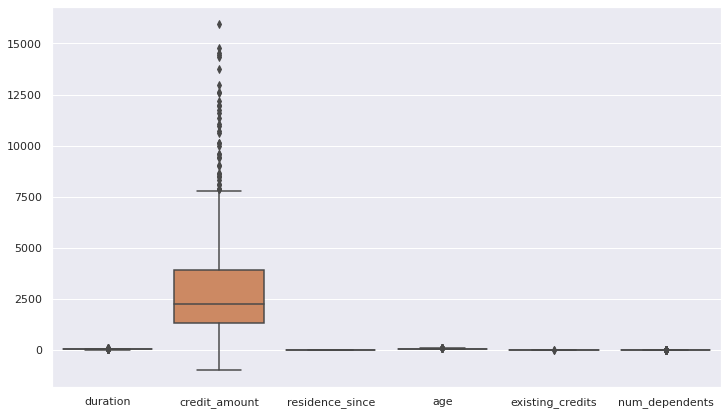

In [9]:
plt.subplots(figsize=(12,7))
sns.boxplot(data=credit_df)

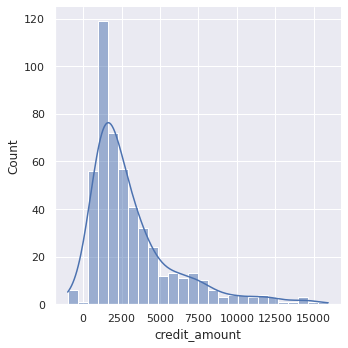

In [10]:
sns.boxplot(x='credit_amount', data=credit_df)
sns.displot(x='credit_amount', data=credit_df, kde = True)

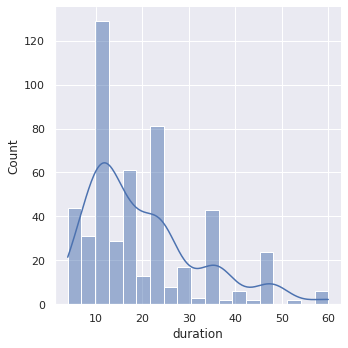

In [11]:
sns.boxplot(x='duration', data=credit_df)
sns.displot(x='duration', data=credit_df, kde = True)

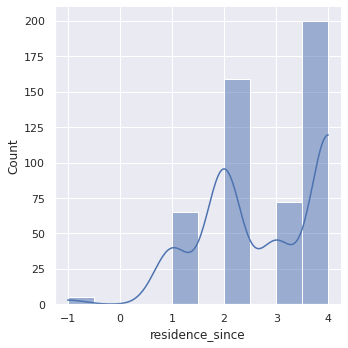

In [12]:
sns.boxplot(x='residence_since', data=credit_df)
sns.displot(x='residence_since', data=credit_df, kde = True)

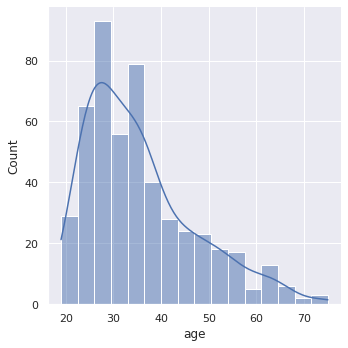

In [13]:
sns.boxplot(x='age', data=credit_df)
sns.displot(x='age', data=credit_df, kde = True)

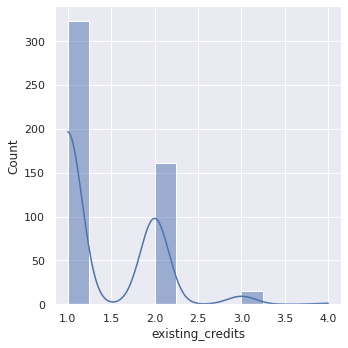

In [14]:
sns.boxplot(x='existing_credits', data=credit_df)
sns.displot(x='existing_credits', data=credit_df, kde = True)

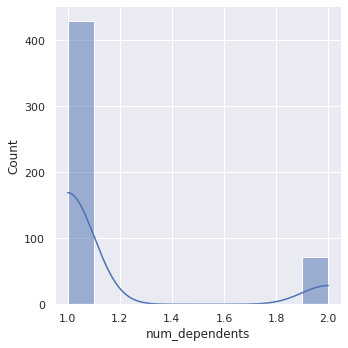

In [15]:
sns.boxplot(x='num_dependents', data=credit_df)
sns.displot(x='num_dependents', data=credit_df, kde = True)

In [16]:
params = ['duration', 'credit_amount', 'residence_since', 'age', 'existing_credits', 'num_dependents']

all_vals = [credit_df[credit_df[x] != np.NaN].checking_status.count() for x in params]
outlines_vals = [credit_df[credit_df[x] > credit_df[x].quantile(q = 0.75) + 1.5*
(credit_df[x].quantile(q = 0.75)-credit_df[x].quantile(q = 0.25))].checking_status.count() for x in params]

d = {key : [val1, str(round(round(val1/val2, 3)*100, 3)) + '%'] for key, val1, val2 in zip(params, outlines_vals, all_vals)}
pd.DataFrame(data = d, index=['abs_amount', 'rel_amount'])

,duration,credit_amount,residence_since,age,existing_credits,num_dependents
abs_amount,34,38,0,17,2,72
rel_amount,6.8%,7.6%,0.0%,3.4%,0.4%,14.4%


# 6. Сколько пропущенных значений в наборе?
# 7. Попытайтесь заполнить пропущенные значения

In [17]:
credit_df.isnull().sum()

checking_status       0
duration              0
credit_history        0
credit_amount         0
employment            0
personal_status       0
other_parties         0
residence_since       0
property_magnitude    0
age                   0
housing               0
existing_credits      0
job                   0
num_dependents        0
own_telephone         0
foreign_worker        0
class                 0
dtype: int64

## Пропущенных значений нет

In [18]:
credit_df.mean()

duration              20.315
credit_amount       3192.220
residence_since        2.782
age                   35.511
existing_credits       1.393
num_dependents         1.144
dtype: float64

In [19]:
credit_df.describe()

,duration,credit_amount,residence_since,age,existing_credits,num_dependents
count,501.000,501.00,501.000,501.000,501.000,501.000
mean,20.315,3192.22,2.782,35.511,1.393,1.144
std,12.103,2839.16,1.162,11.466,0.568,0.351
min,4.000,-999.00,-1.000,19.000,1.000,1.000
25%,12.000,1318.00,2.000,27.000,1.000,1.000
50%,18.000,2241.00,3.000,33.000,1.000,1.000
75%,24.000,3915.00,4.000,41.000,2.000,1.000
max,60.000,15945.00,4.000,75.000,4.000,2.000


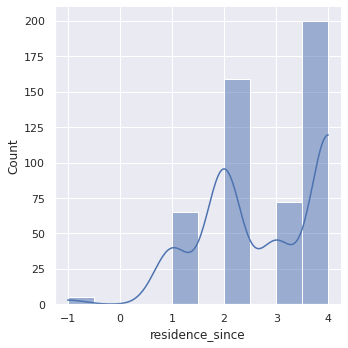

In [20]:
sns.displot(x='residence_since', data=credit_df, kde = True)

## Значение resident_since = -1 некорректно, заменим на 0

In [21]:
for i in credit_df.index:
    if credit_df.at[i, 'residence_since'] < 0:
        credit_df.at[i, 'residence_since'] = 0

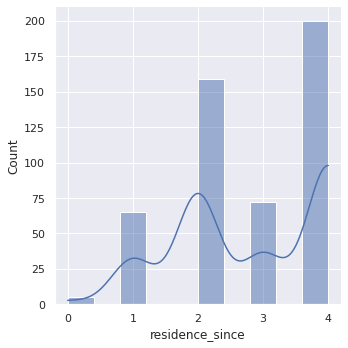

In [22]:
sns.displot(x='residence_since', data=credit_df, kde = True)

## Значение credit_amount = -999.99 некорректно, заменим на 0

In [23]:
credit_df[credit_df.credit_amount < 0].checking_status.count()

6

In [24]:
for i in credit_df.index:
    if credit_df.at[i, 'credit_amount'] < 0:
        credit_df.at[i, 'credit_amount'] = 0

# 8. Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.

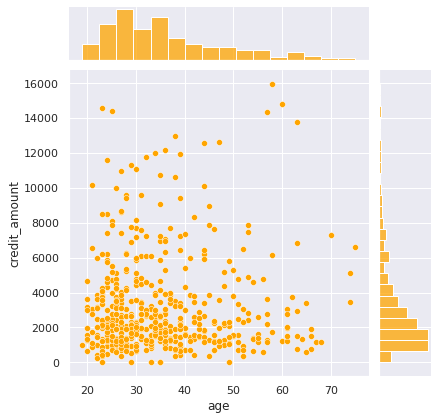

In [25]:
plt.scatter(credit_df['age'], credit_df['credit_amount'], color='red')
plt.title('Age and Credit Amount')
plt.xlabel('age')
plt.ylabel('credit_amount')

sns.jointplot(x='age', y='credit_amount', data=credit_df, kind='scatter', color='orange')

In [26]:
credit_df['Age_equal'] = pd.cut(credit_df['age'], 5)
bins = [19,35,60,100]
group_names = ['Young', 'Adult','Elderly']
credit_df['Age_expert'] = pd.cut(credit_df['age'], bins, labels=group_names)

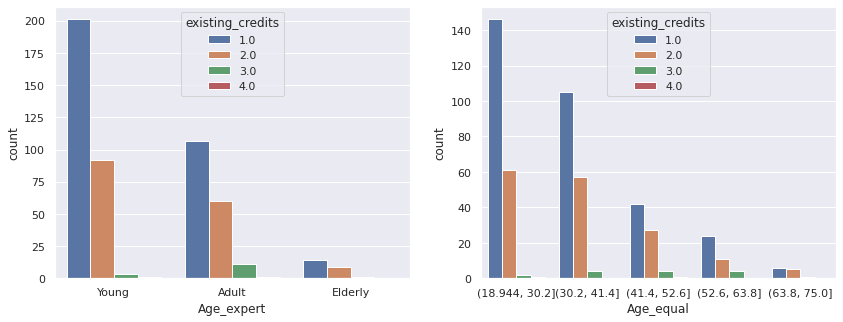

In [27]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

sns.countplot(x='Age_expert', data=credit_df, hue = 'existing_credits', ax=axes[0])
sns.countplot(x='Age_equal', data=credit_df, hue = 'existing_credits', ax=axes[1])

In [28]:
credit_df.housing.value_counts()

own         363
rent         86
for free     52
Name: housing, dtype: int64

In [29]:
credit_df.own_telephone.value_counts()

none    293
yes     208
Name: own_telephone, dtype: int64

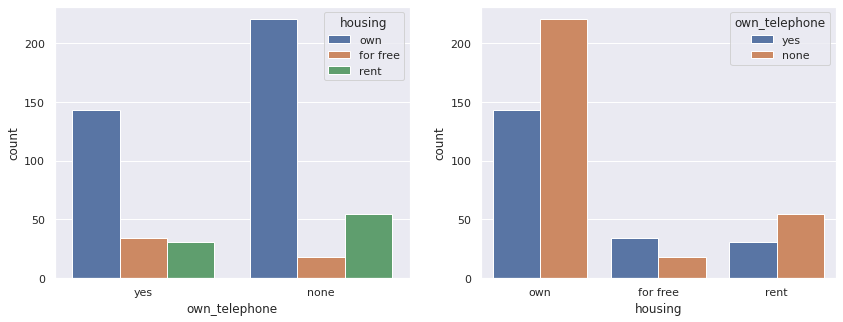

In [30]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

sns.countplot(x='own_telephone', data=credit_df, hue = 'housing', ax=axes[0])
sns.countplot(x='housing', data=credit_df, hue = 'own_telephone', ax=axes[1])

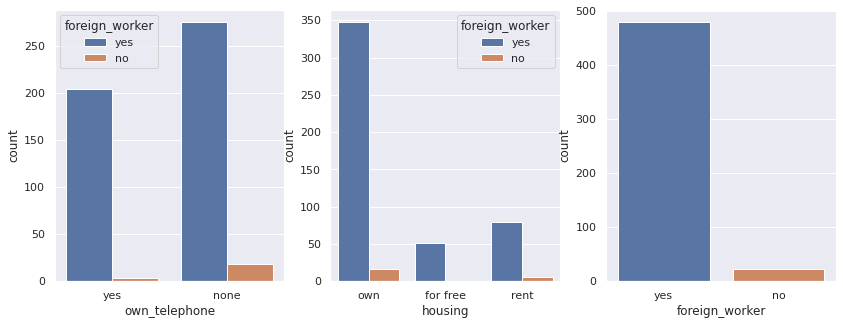

In [31]:
_, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 5))

sns.countplot(x='own_telephone', data=credit_df, hue = 'foreign_worker', ax=axes[0])
sns.countplot(x='housing', data=credit_df, hue = 'foreign_worker', ax=axes[1])
sns.countplot(x='foreign_worker', data=credit_df, ax=axes[2])

In [32]:
credit_df[credit_df.foreign_worker == 'yes']

,checking_status,duration,credit_history,credit_amount,employment,personal_status,other_parties,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,Age_equal,Age_expert
0,<0,6.0,critical/other existing credit,1169.0,>=7,male single,none,4.0,real estate,67.0,own,2.0,skilled,1.0,yes,yes,good,"(63.8, 75.0]",Elderly
1,0<=X<200,48.0,existing paid,5951.0,1<=X<4,female div/dep/mar,none,2.0,real estate,22.0,own,1.0,skilled,1.0,none,yes,bad,"(18.944, 30.2]",Young
2,no checking,12.0,critical/other existing credit,2096.0,4<=X<7,male single,none,3.0,real estate,49.0,own,1.0,unskilled resident,2.0,none,yes,good,"(41.4, 52.6]",Adult
3,<0,42.0,existing paid,7882.0,4<=X<7,male single,guarantor,4.0,life insurance,45.0,for free,1.0,skilled,2.0,none,yes,good,"(41.4, 52.6]",Adult
4,<0,24.0,delayed previously,4870.0,1<=X<4,male single,none,4.0,no known property,53.0,for free,2.0,skilled,2.0,none,yes,bad,"(52.6, 63.8]",Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0<=X<200,36.0,existing paid,0.0,<1,male single,co applicant,1.0,no known property,29.0,rent,1.0,high qualif/self emp/mgmt,1.0,yes,yes,bad,"(18.944, 30.2]",Young
497,no checking,24.0,critical/other existing credit,1585.0,4<=X<7,male single,none,3.0,life insurance,40.0,own,2.0,skilled,1.0,none,yes,good,"(30.2, 41.4]",Adult
498,0<=X<200,18.0,existing paid,1301.0,>=7,male mar/wid,guarantor,2.0,real estate,32.0,own,1.0,unskilled resident,1.0,none,yes,good,"(30.2, 41.4]",Young
499,>=200,6.0,critical/other existing credit,1323.0,>=7,male div/sep,none,4.0,car,28.0,own,2.0,skilled,2.0,yes,yes,good,"(18.944, 30.2]",Young


# 9. Проанализируйте взаимосвязи признаков с помощью scatter-plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?

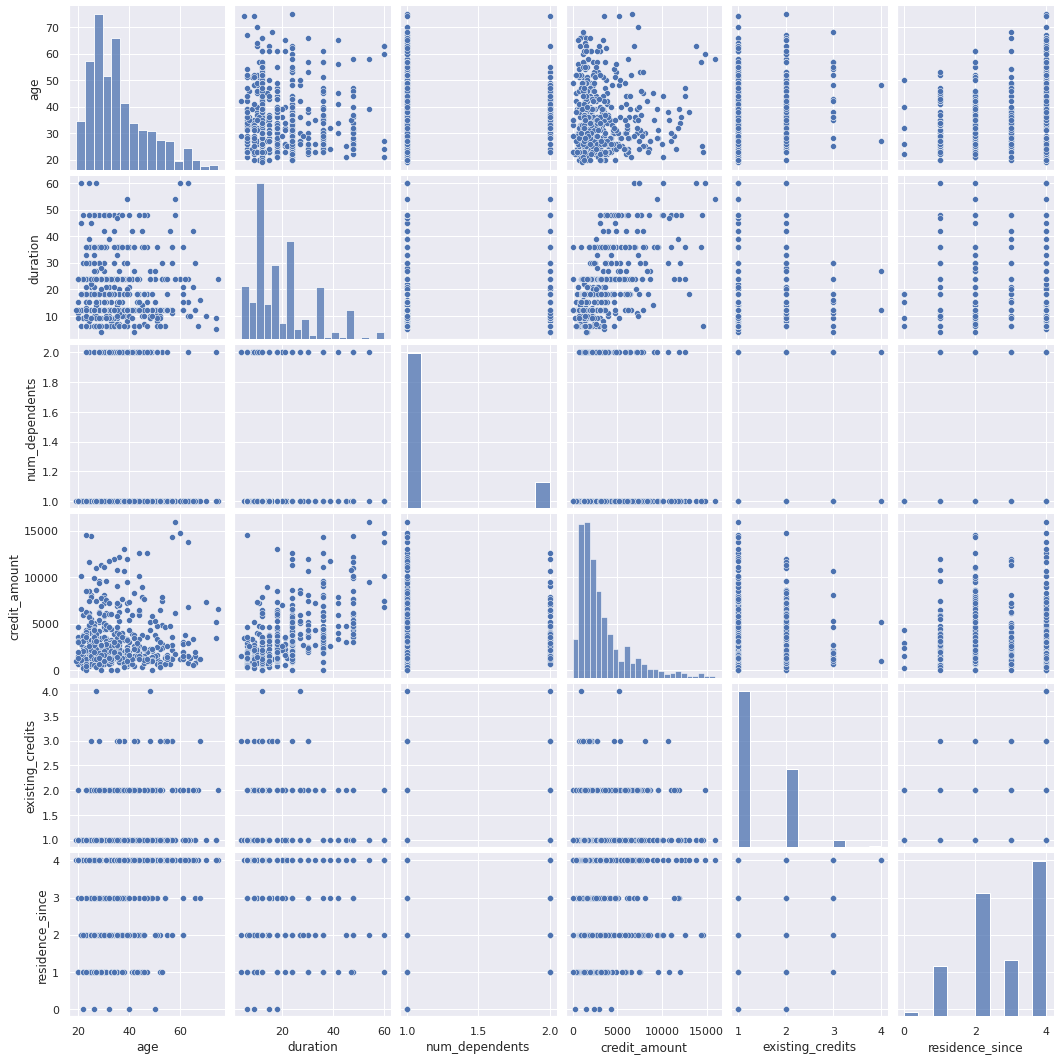

In [33]:
num_columns = list(set(credit_df.columns) -  set(['Age_expert','Age_equal']))
sns.pairplot(credit_df[num_columns])

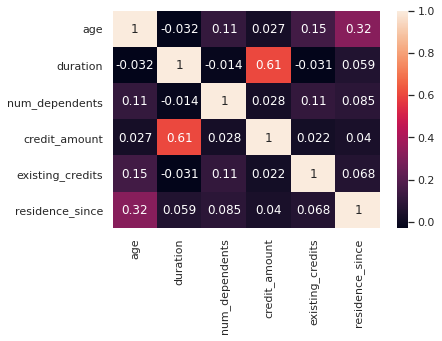

In [34]:
corr_matrix = credit_df[num_columns].corr()
sns.heatmap(corr_matrix, annot=True, annot_kws={"size":12})

## Ярко выраженная корреляция признаков residence_since и duration

# 10. Какой признак(и) имеет смысл стандартизировать? Почему?

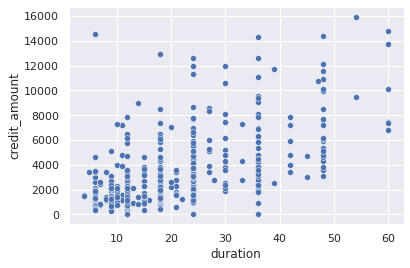

In [35]:
sns.scatterplot(data = credit_df, x = 'duration', y = 'credit_amount')

In [36]:
array = credit_df.loc[:, ['duration', 'credit_amount']].values.tolist()
scaler = StandardScaler().fit(array)

In [37]:
scaler.mean_

array([  20.315, 3204.184])

In [38]:
scaler.scale_

array([  12.091, 2820.684])

In [39]:
X_scaled = scaler.transform(array)

In [40]:
X_scaled

array([[-1.184, -0.722],
       [ 2.29 ,  0.974],
       [-0.688, -0.393],
       ...,
       [-0.191, -0.675],
       [-1.184, -0.667],
       [ 0.305, -0.029]])

In [41]:
scaled_df = pd.DataFrame(X_scaled, columns = ['duration_scaled' , 'credit_amount_scaled'])

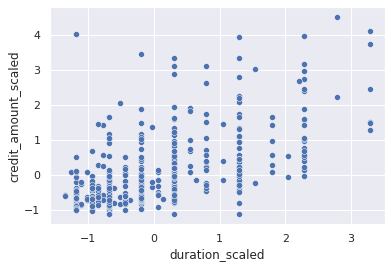

In [42]:
sns.scatterplot(data = scaled_df, x = 'duration_scaled', y = 'credit_amount_scaled')

In [43]:


for i in scaled_df.index:
    scaled_df.at[i, 'duration_scaled'] += 1
    scaled_df.at[i, 'credit_amount_scaled'] += 1

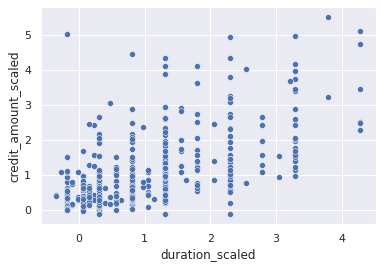

In [44]:
sns.scatterplot(data = scaled_df, x = 'duration_scaled', y = 'credit_amount_scaled')

In [45]:
scaled_df

,duration_scaled,credit_amount_scaled
0,-0.184,0.278
1,3.290,1.974
2,0.312,0.607
3,2.793,2.658
4,1.305,1.591
...,...,...
496,2.297,-0.136
497,1.305,0.426
498,0.809,0.325
499,-0.184,0.333


In [46]:
credit_df.duration.mean()

20.315369261477045

In [47]:
credit_df.duration.std()

12.102906399430399

In [48]:
(credit_df.credit_amount-credit_df.credit_amount.mean())/credit_df.credit_amount.std()

0     -0.721
1      0.973
2     -0.392
3      1.657
4      0.590
       ...  
496   -1.135
497   -0.573
498   -0.674
499   -0.666
500   -0.029
Name: credit_amount, Length: 501, dtype: float64